# Plotting multipoles

In [1]:
import os
import glob

import numpy as np
from matplotlib import pyplot as plt

In [2]:
# These lines of code are setting various parameters for the appearance of plots created using the matplotlib library. 
plt.rc('font', family='serif')
plt.rc('text', usetex=False)
plt.rc('font', family='serif', size = 20)
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.right'] = True
plt.rcParams['figure.figsize'] = (16.0, 8.0)
plt.rcParams['xtick.major.width']  = 1
plt.rcParams['ytick.major.width']  = 1
plt.rcParams['xtick.major.pad']= 8

In [3]:
tracer = 'LRG'
region = 'NScomb' # choices=['NGC', 'SGC', 'NS', 'S', 'NGCS', 'SGCS', 'NScomb']
theory_name = 'bao'
clustering_statistics = 'pk' # choices=['pk', 'xi']
on_the_fly_GaussianCovariance_matrix = '' # choices=['on_the_fly_GaussianCovariance_matrix', '']
zmin, zmax, b0 = {'LRG': (0.4, 1.1, 1.7), 'ELG': (1.1, 1.6, 0.84), 'QSO': (1.6, 2.1, 1.2)}[tracer]

In [4]:
base = '/global/cfs/cdirs/desi/survey/catalogs/main/mocks/FirstGenMocks/AbacusSummit/Y1/mock1/LSScats/'
data_dir = base + 'blinded/jmena/test_w0-*/LSScats/blinded/'

In [5]:
sorted(glob.glob(os.path.join(data_dir, 'pk', 'pk', 'pkpoles_{}_{}_{}_{}_default_lin.npy'.format(tracer, region, zmin, zmax))))

['/global/cfs/cdirs/desi/survey/catalogs/main/mocks/FirstGenMocks/AbacusSummit/Y1/mock1/LSScats/blinded/jmena/test_w0-0.9040043101843285_wa0.025634205416364297/LSScats/blinded/pk/pk/pkpoles_LRG_NScomb_0.4_1.1_default_lin.npy',
 '/global/cfs/cdirs/desi/survey/catalogs/main/mocks/FirstGenMocks/AbacusSummit/Y1/mock1/LSScats/blinded/jmena/test_w0-0.9057030601797708_wa-0.6831142329608426/LSScats/blinded/pk/pk/pkpoles_LRG_NScomb_0.4_1.1_default_lin.npy',
 '/global/cfs/cdirs/desi/survey/catalogs/main/mocks/FirstGenMocks/AbacusSummit/Y1/mock1/LSScats/blinded/jmena/test_w0-0.970439944958287_wa-0.507777992481059/LSScats/blinded/pk/pk/pkpoles_LRG_NScomb_0.4_1.1_default_lin.npy',
 '/global/cfs/cdirs/desi/survey/catalogs/main/mocks/FirstGenMocks/AbacusSummit/Y1/mock1/LSScats/blinded/jmena/test_w0-0.996229742129104_wa0.28930866494014884/LSScats/blinded/pk/pk/pkpoles_LRG_NScomb_0.4_1.1_default_lin.npy',
 '/global/cfs/cdirs/desi/survey/catalogs/main/mocks/FirstGenMocks/AbacusSummit/Y1/mock1/LSScats/bl

In [6]:
sorted(glob.glob(os.path.join(data_dir, 'blinded_parameters_{}.csv'.format(tracer))))

['/global/cfs/cdirs/desi/survey/catalogs/main/mocks/FirstGenMocks/AbacusSummit/Y1/mock1/LSScats/blinded/jmena/test_w0-0.9040043101843285_wa0.025634205416364297/LSScats/blinded/blinded_parameters_LRG.csv',
 '/global/cfs/cdirs/desi/survey/catalogs/main/mocks/FirstGenMocks/AbacusSummit/Y1/mock1/LSScats/blinded/jmena/test_w0-0.9057030601797708_wa-0.6831142329608426/LSScats/blinded/blinded_parameters_LRG.csv',
 '/global/cfs/cdirs/desi/survey/catalogs/main/mocks/FirstGenMocks/AbacusSummit/Y1/mock1/LSScats/blinded/jmena/test_w0-0.970439944958287_wa-0.507777992481059/LSScats/blinded/blinded_parameters_LRG.csv',
 '/global/cfs/cdirs/desi/survey/catalogs/main/mocks/FirstGenMocks/AbacusSummit/Y1/mock1/LSScats/blinded/jmena/test_w0-0.996229742129104_wa0.28930866494014884/LSScats/blinded/blinded_parameters_LRG.csv',
 '/global/cfs/cdirs/desi/survey/catalogs/main/mocks/FirstGenMocks/AbacusSummit/Y1/mock1/LSScats/blinded/jmena/test_w0-1.0485430984101343_wa0.14015686872763022/LSScats/blinded/blinded_par

In [7]:
ell = [0, 2, 4]

def read_pk(tracer, region, zmin, zmax, ell, plot=False):
    # Reading power spectrum from file
    from pypower import PowerSpectrumStatistics

    pk_fn_list = sorted(glob.glob(os.path.join(data_dir, 'pk', 'pk', 'pkpoles_{}_{}_{}_{}_default_lin.npy'.format(tracer, region, zmin, zmax))))
    fn_list = sorted(glob.glob(os.path.join(data_dir, 'blinded_parameters_{}.csv'.format(tracer))))
    
    for ell_ in ell:
        for i, j in zip(pk_fn_list, fn_list):
            w0_blind, wa_blind, f_blind = np.loadtxt(j, delimiter=',', skiprows=1)
            poles = PowerSpectrumStatistics.load(i)
            print('Shot noise is {:.4f}.'.format(poles.shotnoise))  # if cross-correlation, shot noise is 0.
            print('Normalization is {:.4f}.'.format(poles.wnorm))
            plt.plot(poles.kavg, poles.kavg * poles(ell=ell_, complex=False), label='w0:{:.2}, wa:{:.2}, f:{:.2}'.format(w0_blind, wa_blind, f_blind))
            
        dirin = '/global/cfs/cdirs/desi/survey/catalogs/main/mocks/FirstGenMocks/AbacusSummit/Y1/mock1/LSScats/blinded/jmena/unblinded/pk/pk/'
        poles_unblinded = PowerSpectrumStatistics.load(dirin+"/pkpoles_{}_{}_{}_{}_default_lin.npy".format(tracer, region, zmin, zmax))
        plt.plot(poles_unblinded.kavg, poles_unblinded.kavg * poles_unblinded(ell=ell_, complex=False), 'k', label='unblinded')
        plt.legend(loc='upper right', fontsize=13)
        plt.grid(True)
        plt.xlabel(r'$k$ [$h/\mathrm{Mpc}$]')
        plt.ylabel(r'$k P_%d(k)$ [$(\mathrm{Mpc}/h)^{3}$]' % ell_)
        plt.title('{}_{}_{}_{}'.format(tracer, region, zmin, zmax), fontsize=18)
        plt.show()

Shot noise is 4552.4620.
Normalization is 1311.2544.
Shot noise is 4853.4721.
Normalization is 1220.9270.
Shot noise is 4928.0199.
Normalization is 1201.6244.
Shot noise is 4662.8921.
Normalization is 1281.1686.
Shot noise is 4845.6068.
Normalization is 1228.2659.
Shot noise is 4850.1389.
Normalization is 1229.0286.
Shot noise is 5003.0217.
Normalization is 1186.2060.
Shot noise is 5008.7596.
Normalization is 1186.8299.


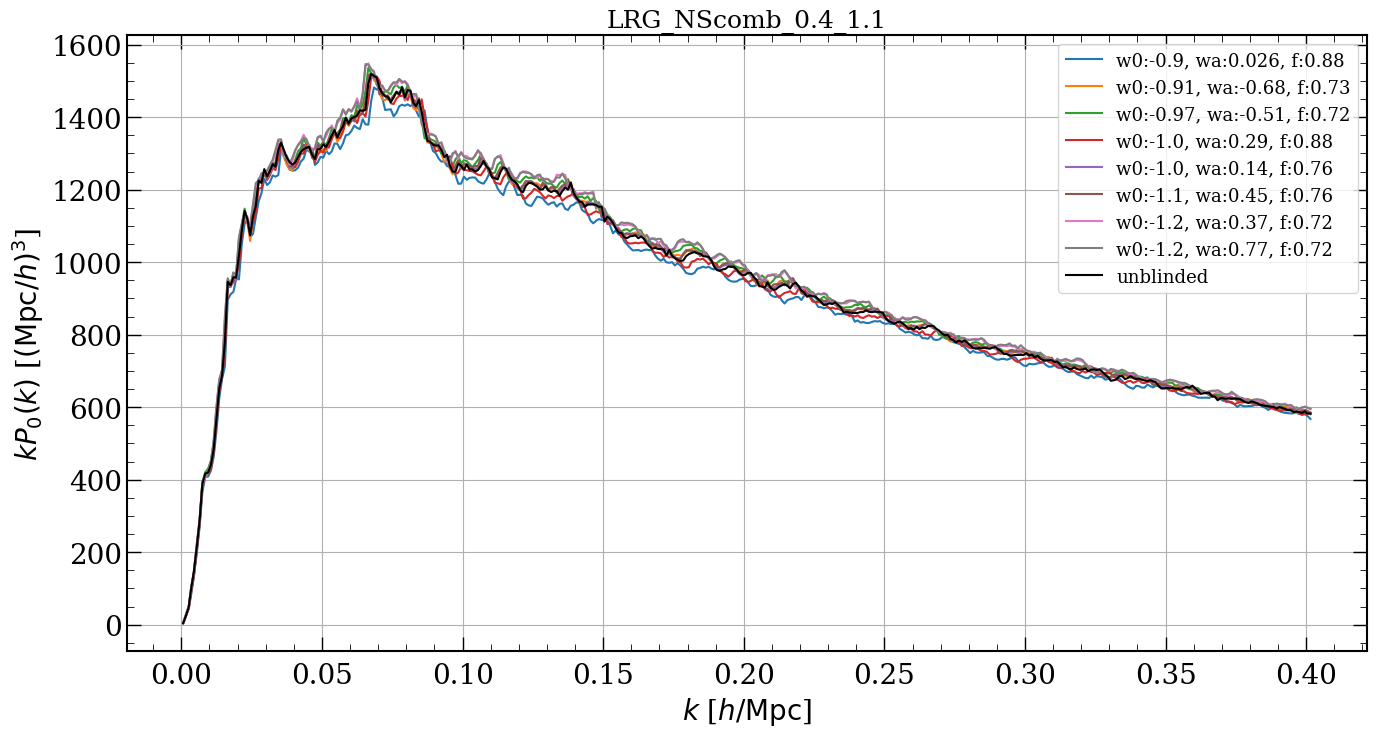

Shot noise is 4552.4620.
Normalization is 1311.2544.
Shot noise is 4853.4721.
Normalization is 1220.9270.
Shot noise is 4928.0199.
Normalization is 1201.6244.
Shot noise is 4662.8921.
Normalization is 1281.1686.
Shot noise is 4845.6068.
Normalization is 1228.2659.
Shot noise is 4850.1389.
Normalization is 1229.0286.
Shot noise is 5003.0217.
Normalization is 1186.2060.
Shot noise is 5008.7596.
Normalization is 1186.8299.


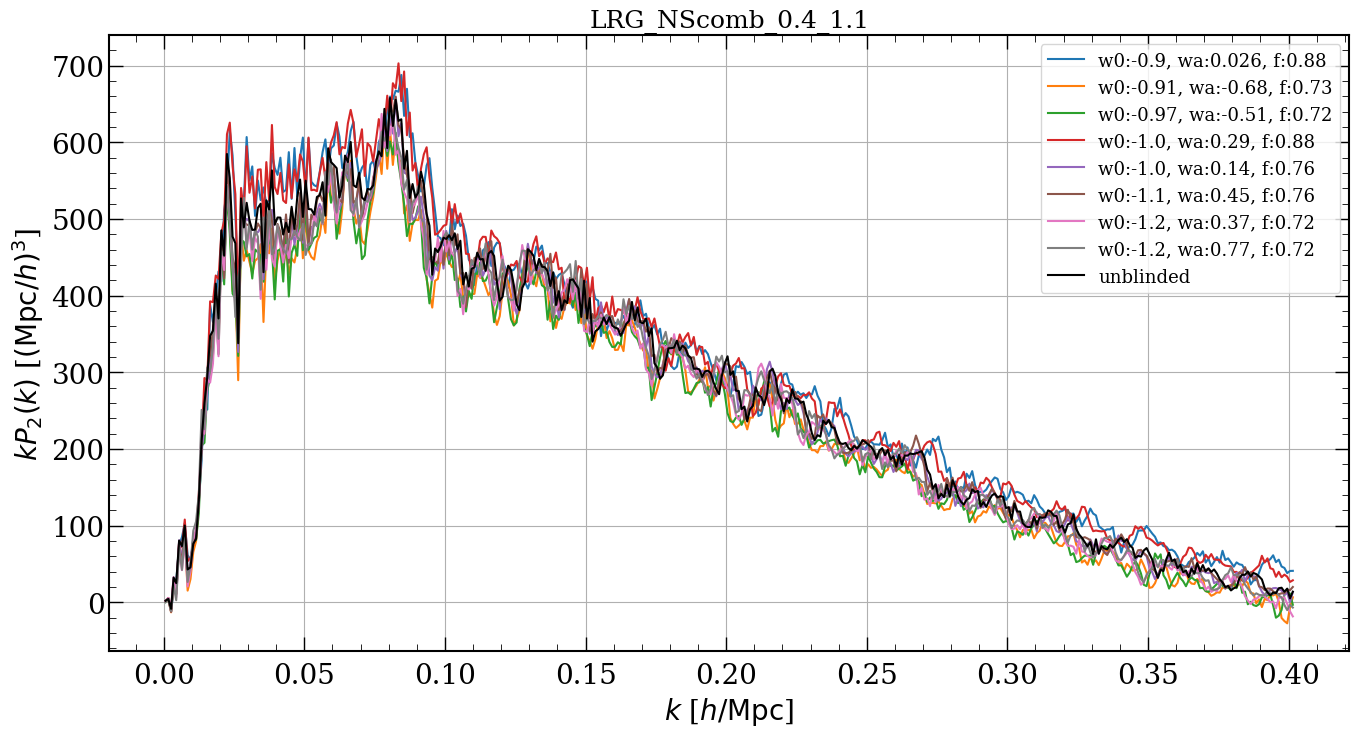

Shot noise is 4552.4620.
Normalization is 1311.2544.
Shot noise is 4853.4721.
Normalization is 1220.9270.
Shot noise is 4928.0199.
Normalization is 1201.6244.
Shot noise is 4662.8921.
Normalization is 1281.1686.
Shot noise is 4845.6068.
Normalization is 1228.2659.
Shot noise is 4850.1389.
Normalization is 1229.0286.
Shot noise is 5003.0217.
Normalization is 1186.2060.
Shot noise is 5008.7596.
Normalization is 1186.8299.


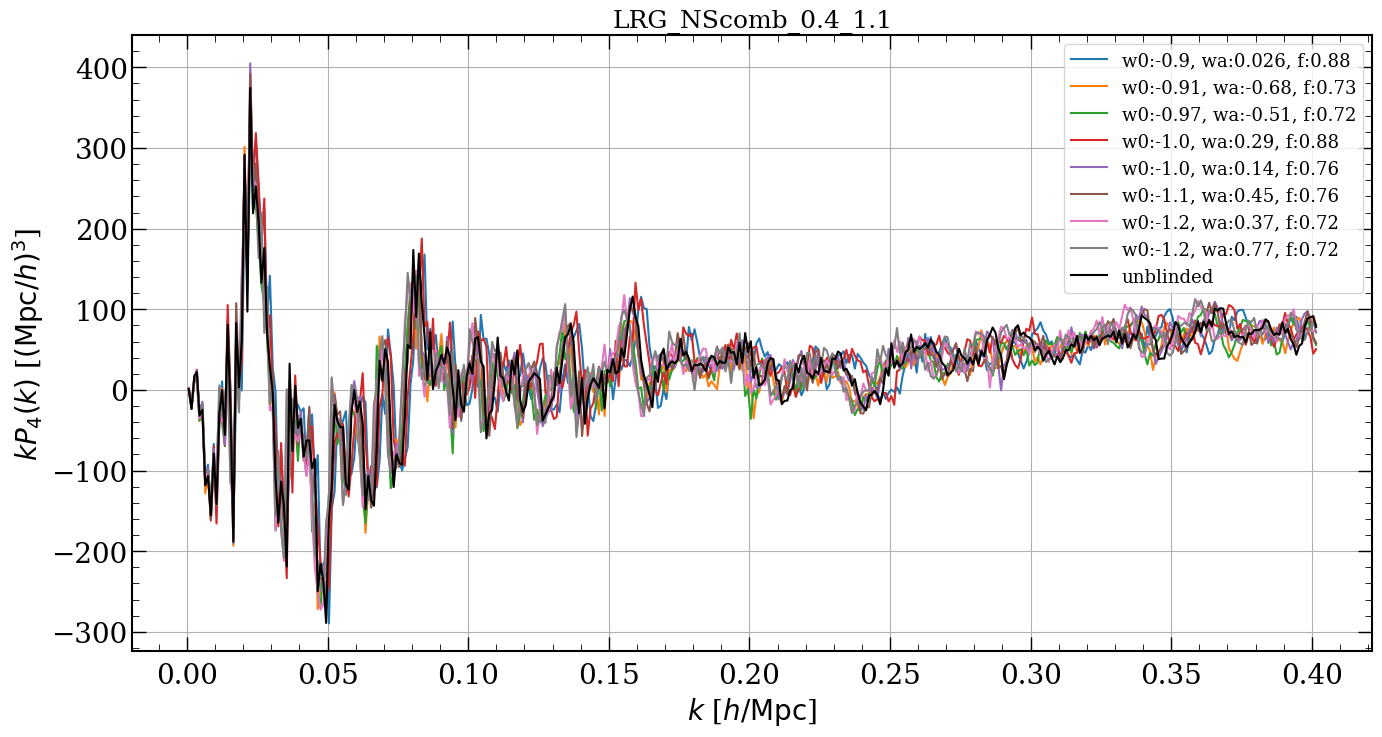

In [8]:
read_pk(tracer, region, zmin, zmax, ell, plot=True)

In [9]:
ell = [0, 2, 4]

def read_xi(tracer, region, zmin, zmax, ell, plot=False):
    # Reading correlation function from file
    from pycorr import TwoPointCorrelationFunction

    xi_fn_list = sorted(glob.glob(os.path.join(data_dir, 'xi', 'smu', 'allcounts_{}_{}_{}_{}_default_lin_njack0_nran1_split20.npy'.format(tracer, region, zmin, zmax))))
    fn_list = sorted(glob.glob(os.path.join(data_dir, 'blinded_parameters_{}.csv'.format(tracer))))
    
    for ell_ in ell:
        for i, j in zip(xi_fn_list, fn_list):
            w0_blind, wa_blind, f_blind = np.loadtxt(j, delimiter=',', skiprows=1)
            result = TwoPointCorrelationFunction.load(i)
            s, xiell = result(ells=ell_, return_sep=True)
            plt.plot(s, s**2 * xiell, label='w0:{:.2}, wa:{:.2}, f:{:.2}'.format(w0_blind, wa_blind, f_blind))

        dirin = '/global/cfs/cdirs/desi/survey/catalogs/main/mocks/FirstGenMocks/AbacusSummit/Y1/mock1/LSScats/blinded/jmena/unblinded/xi/smu/'
        result_unblinded = TwoPointCorrelationFunction.load(dirin+"/allcounts_{}_{}_{}_{}_default_lin_njack0_nran1_split20.npy".format(tracer, region, zmin, zmax))
        s, xiell_unblinded  = result_unblinded(ells=ell_, return_sep=True)
        print(len(s))
        plt.plot(s, s**2 * xiell_unblinded, 'k', label='unblinded')
        plt.legend(loc='upper right', fontsize=13)
        plt.grid(True)
        plt.xlabel(r'$s$')
        plt.ylabel(r'$s^{2} \xi_%d(s)$ [$(\mathrm{Mpc}/h)^{2}$]' % ell_)

        plt.title('{}_{}_{}_{}'.format(tracer, region, zmin, zmax), fontsize=18)
        plt.show()

200


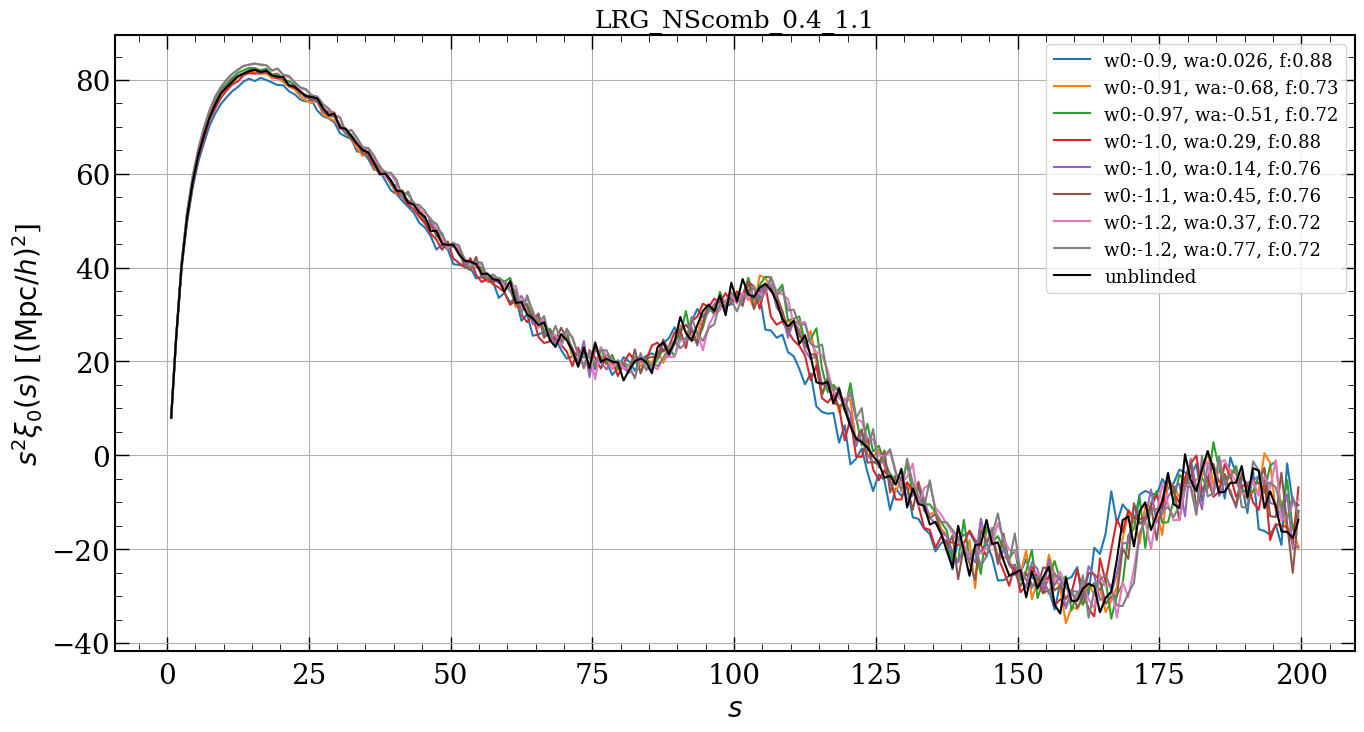

200


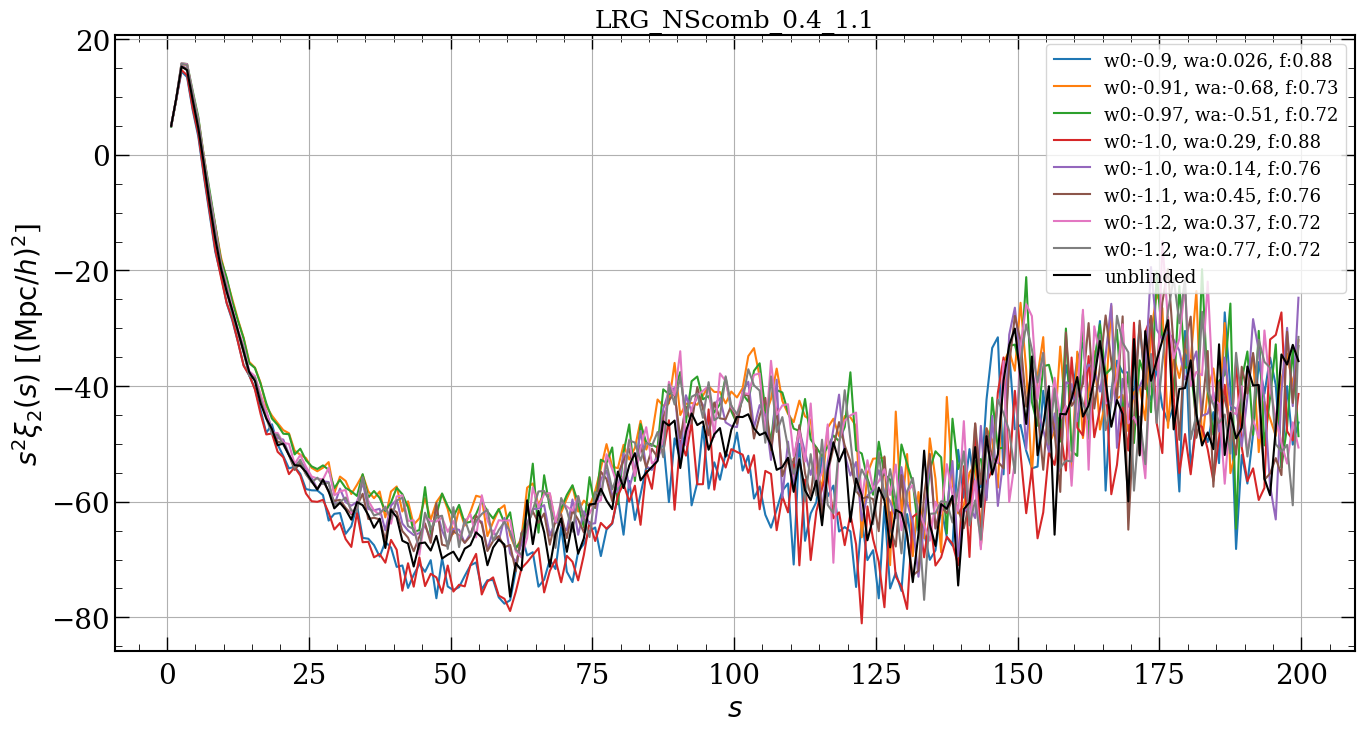

200


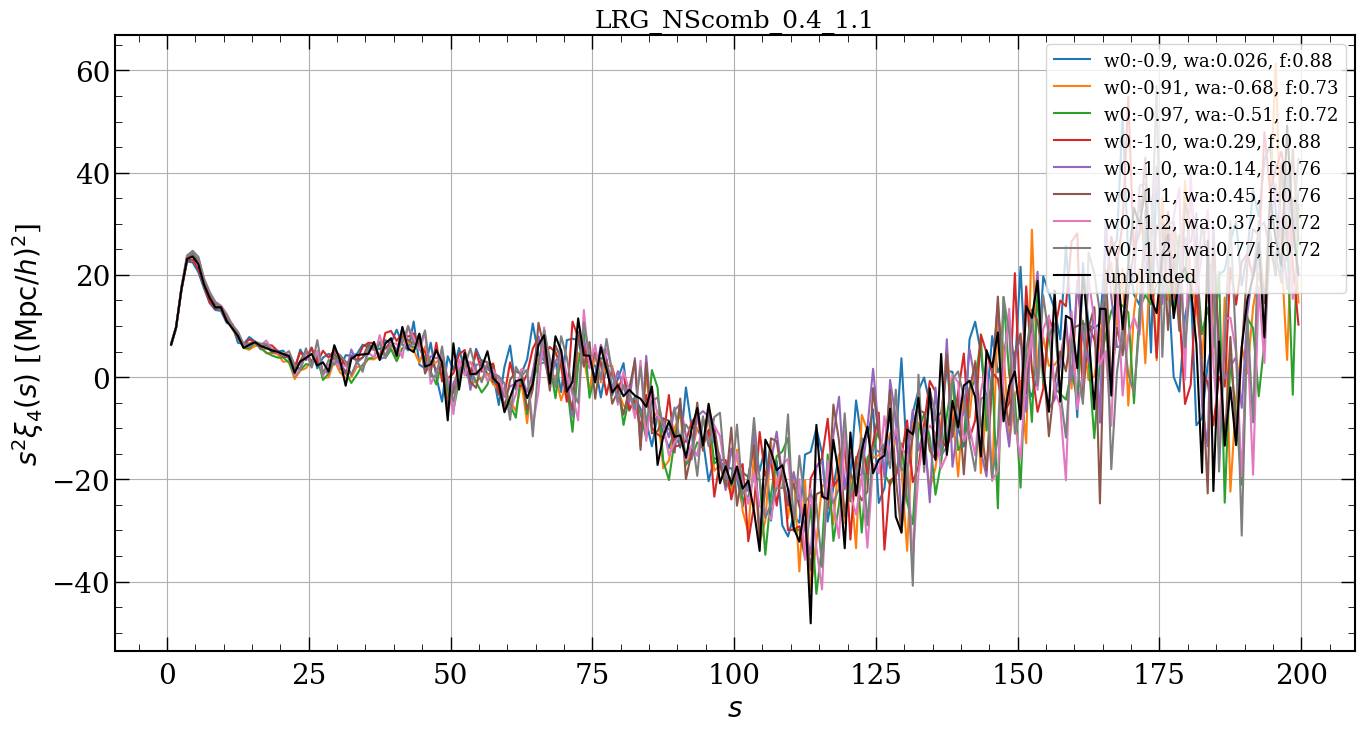

In [10]:
read_xi(tracer, region, zmin, zmax, ell, plot=True)